In [1]:
import pandas as pd
import numpy as np


string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

string_data.isnull()

string_data.dropna()
#等价于string_data[string_data.notnull()]


0     aardvark
1    artichoke
3      avocado
dtype: object

In [3]:
from numpy import nan as NA
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [56]:
data=pd.read_csv('c:/DataSet_ML/dataPre/european_cities.csv')

def tonum(str):
    s=str.replace(',','')
    s=int(s)
    return s
for i in range(len(data)):
    

# data['Population']=data['Population'].apply(lambda x:tonum(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
import re
s = '\r\nabc\t123\nxyz'
print(re.sub('[\r\n\t]', '', s))

abc123xyz


In [2]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[2, 2] = NA
df

NameError: name 'NA' is not defined

In [5]:
data_re=pd.read_csv('c:/DataSet_ML/dataPre/european_cities_lacked.csv')
data_re.head(6)

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,NaN,1-Jun-14
1,2,NaN,Germany,"3,437,916",31-May-14
2,3,Madrid,NaN,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,NaN,"2,273,305",1-Jan-13
5,6,NaN,Romania,"1,883,425",20-Oct-11


In [65]:
data_re.loc[2]

Rank                               3
City                          Madrid
State                            NaN
Population                 3,165,235
Date of census/estimate     1-Jan-14
Name: 2, dtype: object

In [6]:
#data_re.fillna('缺失数据')
#data_re.fillna(method='pad').head(6)#缺失值等于前面一个数据


,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,NaN,1-Jun-14
1,2,London[2],Germany,"3,437,916",31-May-14
2,3,Madrid,Germany,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,Italy,"2,273,305",1-Jan-13
5,6,Paris,Romania,"1,883,425",20-Oct-11


### 判断超出正负3倍标准差的异常值
zscore = (d1 - d1.mean()) / d1.std()
df['out'] = zscore.abs() > 3#添加异常列

In [76]:
import matplotlib.pyplot as plt

df=pd.read_csv('c:/DataSet_ML/dataPre/hz_weather.csv')
df.head()
d1=df["最低气温"]
#判断超出正负3倍标准差的异常值
zscore = (d1 - d1.mean()) / d1.std()
df['out'] = zscore.abs() > 3#添加异常列
df['out'].value_counts()

#del df['test']#删除某一列
df.head()

,日期,最高气温,最低气温,天气,风向,风力,out
0,2017-01-01,17,7,晴,西北风,2级,False
1,2017-01-02,16,8,多云,东北风,2级,False
2,2017-01-03,15,8,多云,东北风,1级,False
3,2017-01-04,15,11,小雨,西北风,2级,False
4,2017-01-05,13,11,小到中雨,北风,2级,False


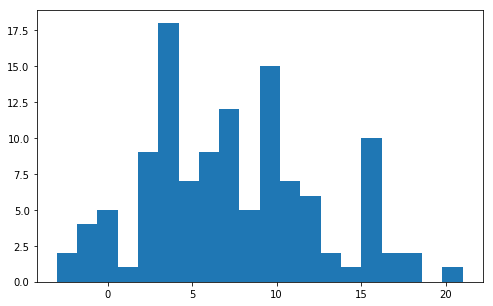

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(df["最低气温"], bins=20)
plt.show()

In [118]:
df.groupby(['最低气温']).describe()['最高气温']
df.groupby(['最低气温'])['最高气温'].mean()

最低气温
-3      6.000000
-2      8.000000
-1      7.500000
 0      8.600000
 1     10.000000
 2      9.333333
 3     11.250000
 4     12.700000
 5     12.571429
 6     15.333333
 7     15.000000
 8     14.200000
 9     14.857143
 10    15.875000
 11    16.571429
 12    22.500000
 13    22.500000
 14    26.000000
 15    27.000000
 16    26.250000
 17    28.500000
 18    27.500000
 21    30.000000
Name: 最高气温, dtype: float64

In [116]:
df.head()

,日期,最高气温,最低气温,天气,风向,风力,out
0,2017-01-01,17,7,晴,西北风,2级,False
1,2017-01-02,16,8,多云,东北风,2级,False
2,2017-01-03,15,8,多云,东北风,1级,False
3,2017-01-04,15,11,小雨,西北风,2级,False
4,2017-01-05,13,11,小到中雨,北风,2级,False


## drop_duplicates去除某一列重复数据

In [111]:
df1=df.drop_duplicates(subset=['最高气温'],keep='first')#重复数据保留一个
df1

,日期,最高气温,最低气温,天气,风向,风力,out
0,2017-01-01,17,7,晴,西北风,2级,False
1,2017-01-02,16,8,多云,东北风,2级,False
2,2017-01-03,15,8,多云,东北风,1级,False
4,2017-01-05,13,11,小到中雨,北风,2级,False
5,2017-01-06,12,10,小雨,东北风,1级,False
6,2017-01-07,11,9,中雨,北风,2级,False
9,2017-01-10,9,4,多云,北风,1级,False
10,2017-01-11,8,5,小雨,北风,1级,False
11,2017-01-12,7,4,小雨,西南风,1级,False
12,2017-01-13,10,1,多云,北风,1级,False


In [114]:
dfnew=df[['最低气温','天气']]
dfnew.head()

,最低气温,天气
0,7,晴
1,8,多云
2,8,多云
3,11,小雨
4,11,小到中雨


In [115]:
df[df['天气']=='晴']

,日期,最高气温,最低气温,天气,风向,风力,out
0,2017-01-01,17,7,晴,西北风,2级,False
13,2017-01-14,10,2,晴,东北风,3级,False
19,2017-01-20,6,-3,晴,东北风,3级,False
21,2017-01-22,8,-2,晴,东北风,2级,False
22,2017-01-23,8,-1,晴,东南风,2级,False
25,2017-01-26,13,3,晴,南风,2级,False
36,2017-02-06,12,3,晴,东风,3级,False
41,2017-02-11,9,0,晴,东南风,1级,False
42,2017-02-12,11,0,晴,东风,1级,False
43,2017-02-13,15,3,晴,北风,微风,False


In [81]:
df_t1=pd.read_csv('c:/DataSet_ML/dataPre/sale_data.csv')
df_t1.head()


d2=df_t1["成交量"]
zscore = (d2 - d2.mean()) / d2.std()
df_t1['out'] = zscore.abs() > 3#添加异常列
df_t1['out']
df_t1.head()

,ID,宝贝,价格,成交量,卖家,位置,out
0,1,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏,True
1,2,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海,False
2,3,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏,False
3,4,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江,False
4,5,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏,False


In [94]:
df_t1.groupby(['位置'])['成交量'].sum()

位置
上海     68015
北京     27116
广东      5164
江苏    309360
河北     18152
河南      5986
浙江    161826
湖北     43274
Name: 成交量, dtype: int64

In [95]:
df_t1.groupby(['位置'])['价格'].mean()

位置
上海    161.200000
北京    150.000000
广东    326.000000
江苏    223.611364
河北    152.000000
河南    119.000000
浙江    290.428571
湖北    254.714286
Name: 价格, dtype: float64

In [96]:
df_t1.groupby(['位置'])['成交量'].mean()

位置
上海    6801.500000
北京    4519.333333
广东    5164.000000
江苏    7030.909091
河北    6050.666667
河南    5986.000000
浙江    5779.500000
湖北    6182.000000
Name: 成交量, dtype: float64

In [99]:
df_t1.groupby(['位置']).count()

,ID,宝贝,价格,成交量,卖家,out
位置,,,,,,
上海,10,10,10,10,10,10
北京,6,6,6,6,6,6
广东,1,1,1,1,1,1
江苏,44,44,44,44,44,44
河北,3,3,3,3,3,3
河南,1,1,1,1,1,1
浙江,28,28,28,28,28,28
湖北,7,7,7,7,7,7


一、给定旅游路线数据集qunar_route_cnt.csv，完成以下操作：
- ①	读取数据，查看最后10行数据
- ②	查看表的数据信息
- ③	按“出发地”分组，统计“目的地”，目的地之间用‘；’隔开
- ④	删除路线页数中的异常值，将数据类型转为int型
- ⑤	按出发地和目的地分组查看路线页数均值
- ⑥	筛选出路线页数大于1000的数据并重置索引
- ⑦  将所有数据按行进行倒序排序

In [125]:
data1=pd.read_csv('c:/DataSet_ML/dataPre/qunar_route_cnt.csv')
print(data1.info())
data1.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
出发地     247 non-null object
目的地     247 non-null object
路线页数    247 non-null object
dtypes: object(3)
memory usage: 5.9+ KB
None


,出发地,目的地,路线页数
242,厦门,北京,1444
243,成都,丽江,1160
244,成都,西安,876
245,武汉,厦门,352
246,武汉,杭州,1234


In [156]:
data1.groupby(['出发地'])['目的地'].apply(';'.join)


出发地
上海    九寨沟;西双版纳;重庆;乌鲁木齐;呼和浩特;太原;大连;哈尔滨;沈阳;张家界;神农架;长沙;...
北京    厦门;青岛;杭州;丽江;九寨沟;大理;西双版纳;昆明;西安;乌鲁木齐;银川;大连;哈尔滨;沈...
南京    厦门;青岛;苏州;丽江;成都;九寨沟;昆明;重庆;西双版纳;西安;西宁;呼和浩特;大连;哈尔...
厦门    九寨沟;重庆;西安;乌鲁木齐;天津;呼和浩特;太原;哈尔滨;沈阳;大连;营口;神农架;长沙;...
大连      厦门;青岛;烟台;九寨沟;重庆;西安;西宁;天津;哈尔滨;张家界;长沙;武汉;湘西;三亚;上海
天津    青岛;厦门;杭州;九寨沟;大理;西双版纳;重庆;西安;西宁;大连;哈尔滨;长沙;武汉;三亚;...
宁波                     青岛;九寨沟;重庆;西安;哈尔滨;大连;武汉;长沙;神农架;桂林
广州    厦门;黄山;丽江;九寨沟;大理;拉萨;西双版纳;西安;西宁;呼和浩特;天津;大连;长春;沈阳...
成都    厦门;青岛;杭州;鼓浪屿;泸沽湖;西宁;乌鲁木齐;鄂尔多斯;天津;哈尔滨;大连;沈阳;武汉;...
杭州    厦门;青岛;丽江;九寨沟;成都;西双版纳;重庆;西安;西宁;呼和浩特;天津;大连;哈尔滨;沈...
武汉                                                厦门;杭州
济南       厦门;丽江;九寨沟;昆明;西安;北京;大连;哈尔滨;沈阳;武汉;长沙;三亚;桂林;深圳;珠海
深圳    厦门;九寨沟;大理;西安;呼和浩特;天津;哈尔滨;大连;沈阳;长春;张家界;武汉;长沙;神农...
重庆     厦门;青岛;鼓浪屿;大理;西安;天津;呼和浩特;哈尔滨;大连;沈阳;长春;武汉;三亚;桂林;丽江
青岛       厦门;丽江;九寨沟;重庆;西安;承德;天津;大连;沈阳;哈尔滨;长沙;武汉;桂林;深圳;海口
Name: 目的地, dtype: object

In [221]:
pd.set_option('display.max_rows', None)

for i in range(len(data1)):
    if not (str.isnumeric(data1['路线页数'][i])):
        data1['路线页数'][i]=-1



In [222]:
data_t=data1[data1['路线页数']!=-1]
data_t

,出发地,目的地,路线页数
0,北京,厦门,359
1,北京,青岛,471
2,北京,杭州,1228
3,北京,丽江,1160
4,北京,九寨沟,168
5,北京,大理,199
6,北京,西双版纳,50
7,北京,昆明,456
8,北京,西安,876
9,北京,乌鲁木齐,136


In [242]:
data_t['路线页数'].groupby([data_t['出发地'],data_t['目的地']]).mean().head()

出发地  目的地 
上海   三亚       397
     丽江      1159
     乌鲁木齐     136
     九寨沟      168
     北京      1444
Name: 路线页数, dtype: int32

In [223]:
data_t['路线页数']=data_t['路线页数'].astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [227]:
data_t['路线页数'].head()

0     359
1     471
2    1228
3    1160
4     168
Name: 路线页数, dtype: int32

二、给定天气数据hz_weather.csv，完成以下操作
- ①	读取数据，查看前10行数据
- ②	检测是否有空值，若有则在原数据集上删除该数据
- ③	删除重复最高气温的记录
- ④	选取‘最低气温’和‘天气’生成新的DataFrame
- ⑤	利用‘均方差法’找出最低气温异常值并统计
- ⑥	筛选出天气为‘晴’的数据

三、给定旅游数据qunar_free_trip.csv，进行以下操作。
- ①	读取数据，查看表的数据信息，查询缺失值
- ②	查看数据集的维度
- ③	查看重复值的个数，删除重复值并检查。
- ④	利用‘均方差法’找出价格异常值并统计
- ⑤	根据出发地和目的地分组计算平均价格和平均节省
- ⑥  抽取前200条和后200条数据，形成新的数据集

四、给定销售数据sale_data.csv，完成以下操作
- ①	读取数据，查看第7至19的数据。
- ② 统计每列缺失值的数量，并将‘价格’列的平均值取代缺失值
- ③	删除‘宝贝’字段及其数据，查看修改后的前5行。
- ④	查看‘价格’字段第一个数据的类型，并将‘价格’字段均转换为整型。
- ⑤ 正态化‘价格’列
- ⑥ 按‘位置’分组，统计各地总成交量。
- ⑦	在第三问的基础上，按总成交量升序排序并打印。

In [157]:
data4=pd.read_csv('c:/DataSet_ML/dataPre/sale_data.csv')
data4[7:20]

,ID,宝贝,价格,成交量,卖家,位置
7,8,中老年女装夏季T恤雪纺衫妈妈装夏装套装短袖中年妇女40-50岁t恤,288.0,12087,zxtvszml,江苏
8,9,妈妈夏装两件套母亲节衣服老人上衣60-70岁人夏季中老年女装套装,298.0,11655,ceo放牛,江苏
9,10,中老年女装夏装套装圆领上衣裤子夏季中年妈妈装短袖T恤两件套,189.0,11632,简港旗舰店,上海
10,11,母亲节衣服夏季中年女装春装套装40-50岁妈妈装外套中老年人上衣,258.0,11568,朵莹旗舰店,浙江
11,12,母亲节衣服中老年人女装奶奶短袖两件套中年40岁胖妈妈装夏装套装,177.0,11125,依诗曼妮,江苏
12,13,母亲节中老年女装短袖t恤40-50岁中年妈妈装夏装套装上衣两件套,298.0,10366,夕牧旗舰店,江苏
13,14,母亲节中老年女装短袖t恤40-50岁中年妈妈装夏装雪纺两件套装,124.0,9113,绰美佳人旗舰店,江苏
14,15,中老年女装春装真两件套长袖针织开衫外套妈妈装夏装短袖T恤上衣,138.0,9060,冉献兵,浙江
15,16,母亲节衣服夏季中年女装夏装短袖40-50岁妈妈装中老年女装连衣裙,298.0,8843,蒲洛妃旗舰店,江苏
16,17,母亲节妈妈夏装套装中老年雪纺衫中年女春装阔腿裤两件套40岁衣服,318.0,8580,薇诗琪旗舰店,湖北


In [166]:
print(data4['价格'].isnull().count())
print(data4['成交量'].isnull().count())
#data4['价格'].fillna(data4['价格'].mean())

100
100


In [171]:
#del data4['宝贝']

In [172]:
data4.head()

,ID,价格,成交量,卖家,位置
0,1,99.0,16647,夏奈凤凰旗舰店,江苏
1,2,286.0,14045,夏洛特的文艺,上海
2,3,298.0,13458,云新旗舰店,江苏
3,4,279.0,13340,韶妃旗舰店,浙江
4,5,59.0,12939,千百奈旗舰店,江苏


In [185]:
data4.sort_values(by="成交量",ascending=True).head()

,ID,价格,成交量,卖家,位置
99,100,688.0,3956,潮流前线9170,浙江
98,99,498.0,3968,蕴涵旗舰店,江苏
97,98,195.0,4000,若澜锦蒂旗舰店,浙江
96,97,181.0,4023,浅恋旗舰店,浙江
95,96,368.0,4041,欧芮嘉旗舰店,湖北


In [189]:
data4.groupby(['位置'])['成交量'].sum()

位置
上海     68015
北京     27116
广东      5164
江苏    309360
河北     18152
河南      5986
浙江    161826
湖北     43274
Name: 成交量, dtype: int64

In [178]:
np.dtype(data4['价格'][0])

dtype('float64')

In [257]:
# d_t=data4['价格'].astype('int')
# mean=data4['价格'].mean()
# std=data4['价格'].std()
# data4['价格'].apply(lambda x: round(((x-mean)/std),2))

五、给定数据集movie_metadata.csv，完成以下操作
①	选取‘director_name’、‘movie_title’两列展示前5行。
②	对’country’列缺失值用空值填充。
③	删除不完整的行。
④	把数据中所有的movie_title修改为大写
⑤	重命名‘title_year’列名为’release_date’;重命名‘movie_facebook_likes’列名为‘facebook_likes’
⑥	将操作后的数据集写为utf-8的CSV文件，命名为clanfile.csv。

In [256]:
# data5=pd.read_csv('c:/DataSet_ML/dataPre/movie_metadata.csv')
# data5['movie_title'].str.upper()

二、给定轨迹数据集 trajectory.txt，完成以下操作（每题 4 分，共 28 分）
① 读取数据，设置列表头为 id，eventtime，lon，lat
② 查看前 10 行
③ 检测空值并删除含有空值的行
④ 统计 id = 5 的数据条数
⑤ 查看重复记录并删除重复值，并输出去除重复值后的记录个数
⑥ 按 id 分组统计总条数
⑦ 按 eventtime 升序排序，查看前 100 条数据

In [ ]:
import pandas as pd

df2=pd.read_csvd('c:/DataSet_ML/')